# Cancels Orders Prediction

What is the project trying to solve? 

Predict if given orders will be cancelled.



# Dataset

A transnational data set which contains all the transactions of online retail store.

Consist of 35,000 data points, 8 features.

Taken from UCI  Machine Learning Repository. 


# Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [4]:
df = pd.read_csv('Online Retail_Sample.csv',encoding= 'unicode_escape')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565232,23166,MEDIUM CERAMIC TOP STORAGE JAR,1,9/2/2011 9:30,2.46,NaN,United Kingdom
1,552508,22132,RED LOVE HEART SHAPE CUP,1,5/9/2011 16:27,1.63,NaN,United Kingdom
2,544070,84378,SET OF 3 HEART COOKIE CUTTERS,12,2/15/2011 14:19,1.25,15370.0,United Kingdom
3,576618,90197B,BLACK GLASS BRACELET W HEART CHARMS,1,11/15/2011 17:00,4.98,NaN,United Kingdom
4,577719,22811,SET OF 6 T-LIGHTS CACTI,48,11/21/2011 12:20,2.55,16013.0,United Kingdom
5,541406,22283,6 EGG HOUSE PAINTED WOOD,2,1/17/2011 15:19,7.95,14657.0,United Kingdom
6,562933,21992,VINTAGE PAISLEY STATIONERY SET,4,8/10/2011 16:51,2.46,NaN,United Kingdom
7,581439,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,1,12/8/2011 16:30,4.96,NaN,United Kingdom
8,572856,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,6,10/26/2011 12:28,1.25,18118.0,United Kingdom
9,538566,85199L,LARGE HANGING IVORY & RED WOOD BIRD,1,12/13/2010 11:21,1.28,NaN,United Kingdom


#  Handling Missing

In [5]:
# see the missing value
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description     112
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     8844
Country           0
dtype: int64

In [8]:
# percentage of missing data
df.isnull().sum()/df.shape[0]*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.320000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.268571
Country         0.000000
dtype: float64

# Data Cleaning

since we have 25% missing valuse in CustomerID and we can't fallin by median or mode we are going to drop it

In [9]:
df.dropna(subset=['CustomerID'], inplace=True)

In [10]:
#convert type from object to dateTime
df['InvoiceDate']=pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M') 
df['Year'] = df.InvoiceDate.dt.year # adding year feature 
df['Month'] = df.InvoiceDate.dt.month # adding month feature 

In [11]:
# add new column that is total amount spend 
df['total_amount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,total_amount
2,544070,84378,SET OF 3 HEART COOKIE CUTTERS,12,2011-02-15 14:19:00,1.25,15370.0,United Kingdom,2011,2,15.00
4,577719,22811,SET OF 6 T-LIGHTS CACTI,48,2011-11-21 12:20:00,2.55,16013.0,United Kingdom,2011,11,122.40
5,541406,22283,6 EGG HOUSE PAINTED WOOD,2,2011-01-17 15:19:00,7.95,14657.0,United Kingdom,2011,1,15.90
8,572856,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,6,2011-10-26 12:28:00,1.25,18118.0,United Kingdom,2011,10,7.50
11,571033,22531,MAGIC DRAWING SLATE CIRCUS PARADE,24,2011-10-13 12:46:00,0.42,14251.0,United Kingdom,2011,10,10.08


In [12]:
# covert StockCode to numeric 
df['StockCode'] = pd.to_numeric(df['StockCode'].astype(str).str[:-1], errors='coerce')

In [13]:
# drop the null value
df.dropna(subset=['StockCode'], inplace=True)

In [14]:
# sing canceled order by C in the of InvoiceNo
canceled_orders = df[df['InvoiceNo'].apply(lambda x: x[0]=='C')]
canceled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,total_amount
21,C543347,2232.0,ROUND SNACK BOXES SET OF4 WOODLAND,-3,2011-02-07 12:44:00,2.95,12472.0,Germany,2011,2,-8.85
47,C578832,2237.0,WALL TIDY RETROSPOT,-1,2011-11-25 15:18:00,2.10,13069.0,United Kingdom,2011,11,-2.10
81,C539576,15056.0,EDWARDIAN PARASOL NATURAL,-6,2010-12-20 12:25:00,5.95,14911.0,EIRE,2010,12,-35.70
154,C569944,2236.0,GLASS JAR PEACOCK BATH SALTS,-3,2011-10-06 18:12:00,2.95,17405.0,United Kingdom,2011,10,-8.85
288,C548460,2299.0,COTTON APRON PANTRY DESIGN,-2,2011-03-31 11:58:00,4.95,16801.0,United Kingdom,2011,3,-9.90


In [20]:
# add order_canceled column
df['order_canceled'] = df['InvoiceNo'].apply(lambda x:int('C' in x)) 
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,total_amount,order_canceled
2,544070,8437.0,SET OF 3 HEART COOKIE CUTTERS,12,2011-02-15 14:19:00,1.25,15370.0,United Kingdom,2011,2,15.00,0
4,577719,2281.0,SET OF 6 T-LIGHTS CACTI,48,2011-11-21 12:20:00,2.55,16013.0,United Kingdom,2011,11,122.40,0
5,541406,2228.0,6 EGG HOUSE PAINTED WOOD,2,2011-01-17 15:19:00,7.95,14657.0,United Kingdom,2011,1,15.90,0
8,572856,85036.0,ROSE 1 WICK MORRIS BOXED CANDLE,6,2011-10-26 12:28:00,1.25,18118.0,United Kingdom,2011,10,7.50,0
11,571033,2253.0,MAGIC DRAWING SLATE CIRCUS PARADE,24,2011-10-13 12:46:00,0.42,14251.0,United Kingdom,2011,10,10.08,0
12,555602,2329.0,SPOTTY BUNTING,6,2011-06-06 11:26:00,4.95,16235.0,United Kingdom,2011,6,29.70,0
13,549543,2155.0,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-04-10 11:14:00,2.55,18118.0,United Kingdom,2011,4,5.10,0
14,566193,2234.0,TEA BAG PLATE RED RETROSPOT,12,2011-09-09 13:37:00,0.85,14961.0,United Kingdom,2011,9,10.20,0
15,569416,2332.0,SET 6 SCHOOL MILK BOTTLES IN CRATE,4,2011-10-04 10:15:00,3.75,13801.0,United Kingdom,2011,10,15.00,0
16,578924,2212.0,NOEL WOODEN BLOCK LETTERS,1,2011-11-27 12:10:00,5.95,16983.0,United Kingdom,2011,11,5.95,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26020 entries, 2 to 34999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   InvoiceNo       26020 non-null  object        
 1   StockCode       26020 non-null  float64       
 2   Description     26020 non-null  object        
 3   Quantity        26020 non-null  int64         
 4   InvoiceDate     26020 non-null  datetime64[ns]
 5   UnitPrice       26020 non-null  float64       
 6   CustomerID      26020 non-null  float64       
 7   Country         26020 non-null  object        
 8   Year            26020 non-null  int64         
 9   Month           26020 non-null  int64         
 10  total_amount    26020 non-null  float64       
 11  order_canceled  26020 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 2.6+ MB


# Exploratory Data Analysis

We are going to do some EDA to understand the dataset

In [22]:
df['Country'].value_counts() 

United Kingdom          23212
France                    577
Germany                   570
EIRE                      433
Spain                     166
Netherlands               139
Belgium                   130
Switzerland               114
Portugal                   97
Australia                  84
Norway                     67
Finland                    56
Channel Islands            49
Cyprus                     43
Italy                      41
Sweden                     34
Austria                    28
Poland                     19
Japan                      18
USA                        18
Denmark                    18
Singapore                  16
Malta                      16
Israel                     16
Iceland                    11
Unspecified                10
Canada                      9
Greece                      6
Brazil                      5
European Community          5
United Arab Emirates        4
Lebanon                     4
Lithuania                   3
Saudi Arab

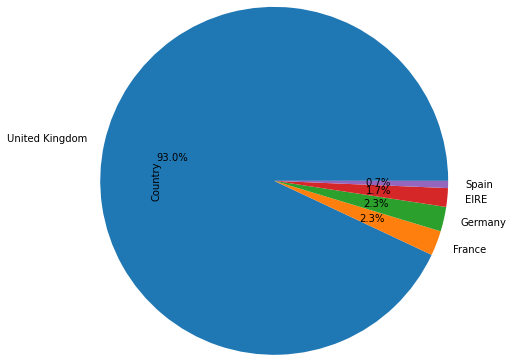

In [24]:
#Top 5 countries with with highest number of orders

df['Country'].value_counts()[:5].plot(kind = 'pie', autopct='%1.1f%%',radius=2);

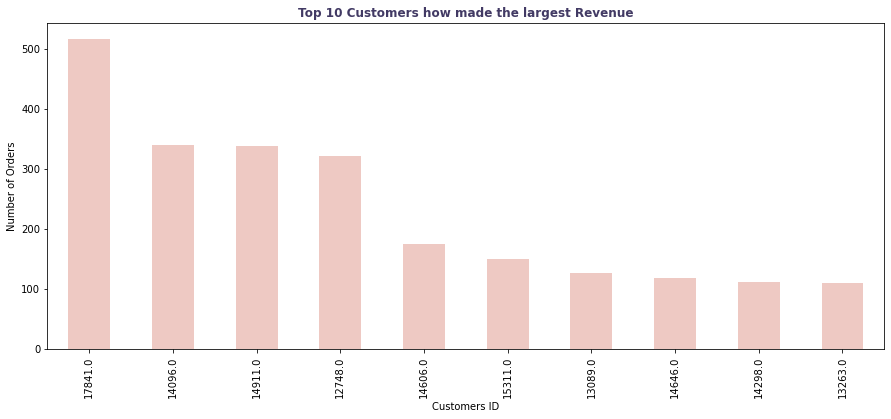

In [62]:
#Top 10 Customers how made the largest Revenue 
plt.subplots(figsize=(15,6))
df['CustomerID'].value_counts().head(10).plot(kind = 'bar',color='#eec9c3');
plt.title('Top 10 Customers how made the largest Revenue',fontweight='bold',color='#423a64')

plt.xlabel('Customers ID')
plt.ylabel('Number of Orders');
plt.show()

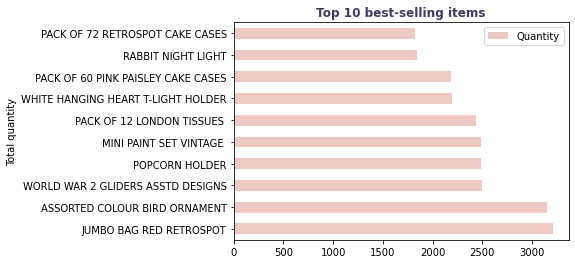

In [63]:
# Top 10 best-selling items

Top10 = df.groupby('Description',as_index=False)[['Quantity','total_amount']].sum().sort_values(by='Quantity', ascending=False).head(10)
ax = Top10.plot(x="Description", y="Quantity",kind='barh',color='#eec9c3');

plt.title('Top 10 best-selling items',fontweight='bold',color='#423a64');
ax.set_ylabel('Total quantity');

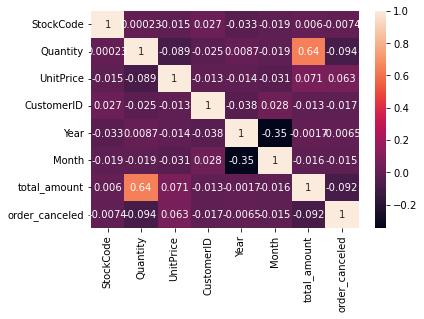

In [35]:
# Correlation 
corrmat=df.corr()
top_corr=corrmat.index
g=sns.heatmap(df[top_corr].corr(),annot=True )

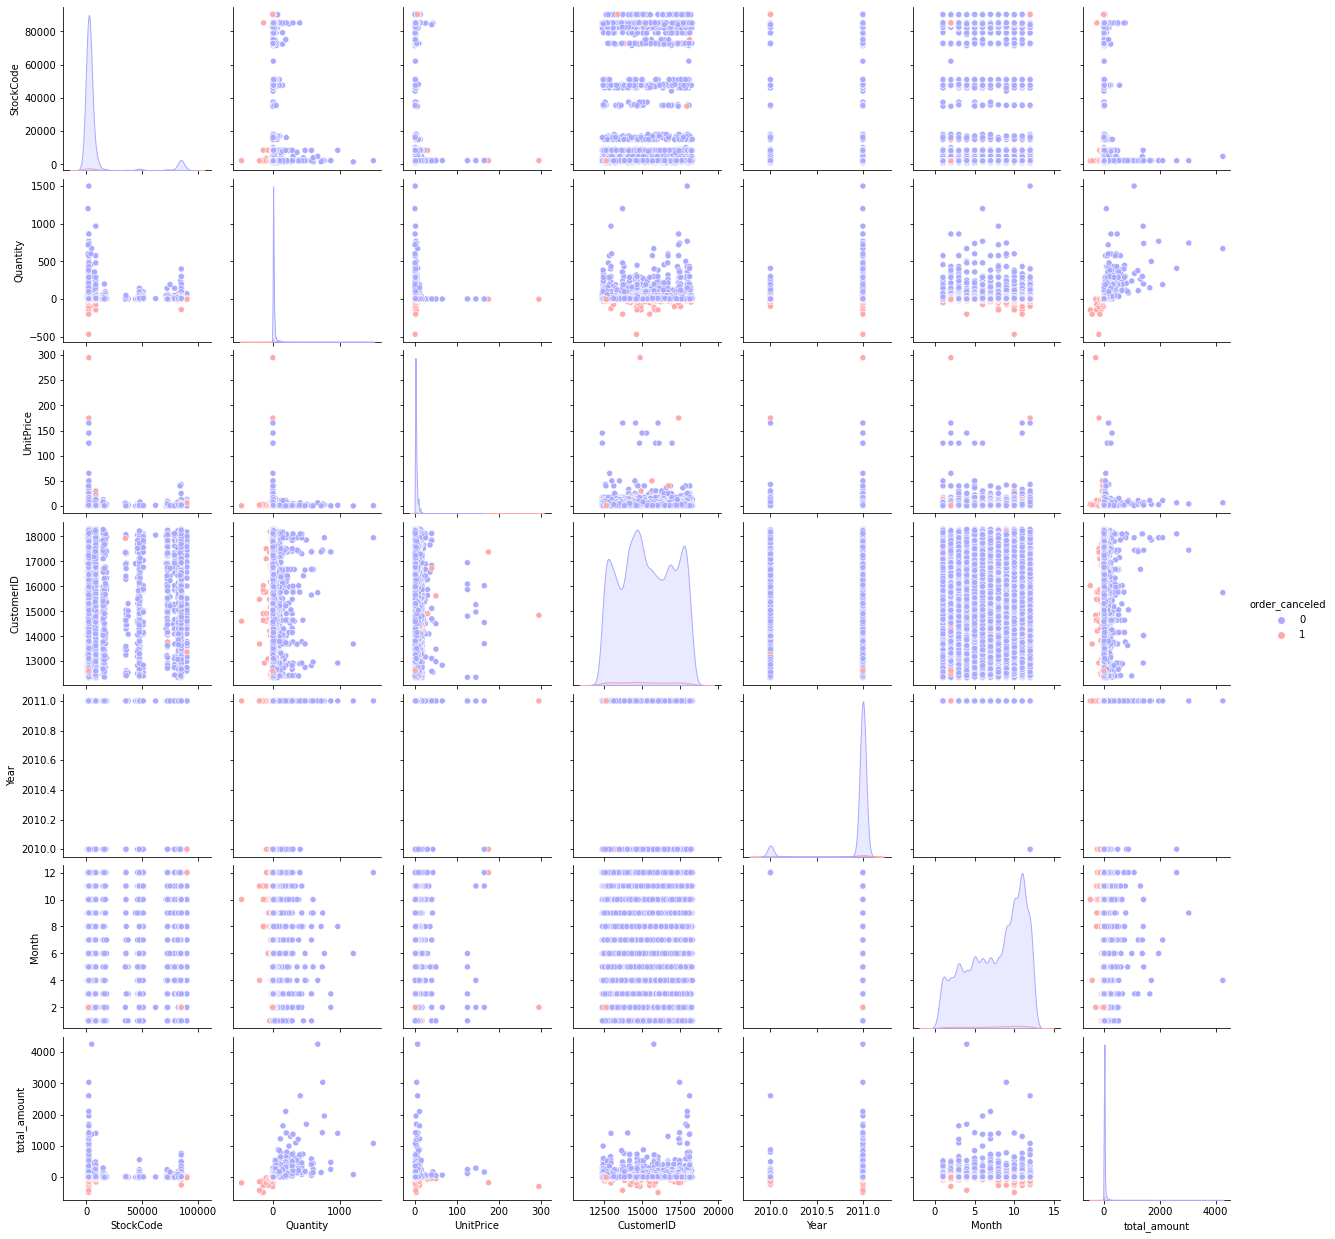

In [36]:
sns.pairplot(df,hue='order_canceled',palette='bwr')

In [28]:
# Percentage of canceled orders is:
round(canceled_orders.shape[0]/df.shape[0]*100,2) 

2.21

C:\Users\win10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


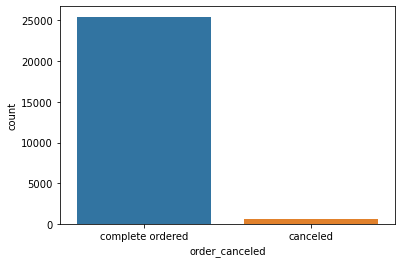

In [133]:
g = sns.countplot(df['order_canceled'])
g.set_xticklabels(['complete ordered','canceled'])
plt.show();

In [125]:
df['order_canceled'].value_counts()

0    25446
1      574
Name: order_canceled, dtype: int64

# Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [116]:
# features selection
X = df[['Month','CustomerID','StockCode']] 
y = df['order_canceled']

In [118]:
from sklearn.linear_model import LogisticRegression

In [120]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

In [123]:
from sklearn.metrics import classification_report

We can see the observation in one class is higher than the observation in other classes then there exists a class imbalance
we gonna to solve it by using NearMiss that will make the majority class equal to the minority class. 

# NearMiss

In [127]:
from imblearn import under_sampling, over_sampling
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(X, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 25446, 1: 574})
Resample dataset shape: Counter({0: 574, 1: 574})


# Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm, y_nm, test_size =0.3, random_state=42)
rfc = LogisticRegression()

# fit the predictor and target
rfc.fit(x_train1, y_train1)

# predict
rfc_predict = rfc.predict(x_test1)# check performance

print('ROCAUC score:',roc_auc_score(y_test1, rfc_predict))
print('Accuracy score:',accuracy_score(y_test1, rfc_predict))
print('F1 score:',f1_score(y_test1, rfc_predict))
print(classification_report(y_test1,rfc_predict))

ROCAUC score: 0.546195652173913
Accuracy score: 0.5594202898550724
F1 score: 0.42424242424242425
              precision    recall  f1-score   support

           0       0.57      0.74      0.64       184
           1       0.54      0.35      0.42       161

    accuracy                           0.56       345
   macro avg       0.55      0.55      0.53       345
weighted avg       0.56      0.56      0.54       345



# Random Forest Classifier

In [154]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm, y_nm, test_size =0.3, random_state=42)
rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train1, y_train1)

# predict
rfc_predict = rfc.predict(x_test1)# check performance

print('ROCAUC score:',roc_auc_score(y_test1, rfc_predict))
print('Accuracy score:',accuracy_score(y_test1, rfc_predict))
print('F1 score:',f1_score(y_test1, rfc_predict))
print(classification_report(y_test1,rfc_predict))

ROCAUC score: 0.6995341614906831
Accuracy score: 0.7043478260869566
F1 score: 0.6644736842105262
              precision    recall  f1-score   support

           0       0.70      0.77      0.74       184
           1       0.71      0.63      0.66       161

    accuracy                           0.70       345
   macro avg       0.70      0.70      0.70       345
weighted avg       0.70      0.70      0.70       345



 XGBClassifier which is an advanced implementation of gradient boosting algorithm.
XGBoost applies a better regularization technique to reduce overfitting.

# XGBClassifier

In [150]:

from xgboost import XGBClassifier

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm, y_nm, test_size =0.3, random_state=42)

m = XGBClassifier(use_label_encoder =False)
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

[22:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROCAUC score: 0.7814440993788819
Accuracy score: 0.7855072463768116
F1 score: 0.758169934640523


In [151]:
print(classification_report(y_test1,predict_y))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       184
           1       0.80      0.72      0.76       161

    accuracy                           0.79       345
   macro avg       0.79      0.78      0.78       345
weighted avg       0.79      0.79      0.78       345



# Conclusion

The performance of Random Forest Classifier was better than Logistic Regression.

The XGBClassifier was the best performance than other techniques with 78% accuracy score
and 0.7 F1 score.

the same process will applied on real data.

# The end, Thank you